# Project: Wrangling and Analyze Data

- [Introduction](#Introduction)
- [Data Gathering](#Gathering)
- [Assessing](#Assessing)
- [Cleaning](#Cleaning)
- [Visualization](#Visualization)

### Introduction

The tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. We will be working this tweeter dataset and explore the wrangling and analyses data process. 

## Gathering
In this section I gathered all three pieces of data for required to work with this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)
2. Downloaded the tweet image prediction (image_predictions.tsv) using python request library and the URl provided.
3. Used the Tweepy library to query additional data via the Twitter API (tweet_json.txt) using my own twitter developer credentials.

In [1]:
import requests
import numpy as np
import os
import pandas as pd
import tweepy
from tweepy import OAuthHandler
import json
import collections
from timeit import default_timer as timer
import matplotlib.pyplot as plt                                     
%matplotlib inline
import re
import seaborn as sns 
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

In [2]:
archive_df = pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

folder_name = 'imagePredictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
    
with open(os.path.join(folder_name, url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)

In [4]:
os.listdir(folder_name)

['image-predictions.tsv']

In [5]:
image_predictions_df = pd.read_csv(folder_name + '/image-predictions.tsv', sep='\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [6]:
# # Code for retrieving tweet data for each of the tweet ids contained in the WeRateDogs twitter
# # archive.
# consumer_key = 'YqFJ3wDVgirKu7w0WSEIzDg1C'
# consumer_secret = 'YN4XjrHzU1oZLumxRGBjAav6i0d2Nzh1993NxqWUadsxIVhz7g'
# access_token = ' '
# access_secret = ' '

# # Create tweepy api object
# auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_secret)
# api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

# # Get all of the tweet data for each tweet id
# tweet_ids = pd.read_csv('twitter-archive-enhanced.csv').tweet_id.astype(str).tolist()
# with open('tweet_json.txt', 'w') as tweet_data_file:
#     for tweet_id in tweet_ids:
#         try:
#             tweet_data = api.get_status(tweet_id, tweet_mode='extended')
#         except tweepy.TweepError:
#             pass
#         else:
#             tweet_data_file.write(json.dumps(tweet_data._json) + '\n')
#             print('Retrieved data for tweet id: {}'.format(tweet_id))
# print('Retrieved data for all tweet ids.')

In [7]:
# Create a dataframe from the Json tweet data that we just retrieved.
tweet_data = []
with open('tweet_json.txt') as data_file:
    for json_obj in data_file:
        tweet_data_sub = collections.OrderedDict()
        tweet_data_all = json.loads(json_obj)

        # Get all of the data we're interested in
        tweet_data_sub['tweet_id'] = tweet_data_all['id']
        tweet_data_sub['retweet_count'] = tweet_data_all['retweet_count']
        tweet_data_sub['favorite_count'] = tweet_data_all['favorite_count']

        # Append it to the data gathering list
        tweet_data.append(tweet_data_sub)

# Create a dataframe from the data
additial_twitter_data = pd.DataFrame(tweet_data)

###### Now, we have done the first step of data analysis "Gethering Data" 
###### We have created and loaded the following dataframes:

`tweet_data_archived`: contains data about the archived WeRateDogs tweets.
`tweet_data_extra`: contains additional data about the WeRateDogs tweets gathered from Twitter.
`tweet_image_pred`: contains the prediction results of a machine learning algorithm trained on a sample of the images from the tweets in the WeRateDogs archive.

## Assessing 
Our second step of the data wrangle is assessing our data. Our task in this section is to be a detective inspecting our data quality issues and lack of tidiness. We are to detect and document at least **eight (8) quality issues and two (2) tidiness issue**. using both visual assessment (scrolling through the data in a prefered sofware application like excel, google sheets etc.​)  and programmatic assessement(using code) to assess the data using the pandas function such as describe(), info() etc.

### Visual and programatic assessment 

#### 1. Assesing the enhanced Twitter Archive Data

In [8]:
# Display the enhanced twitter archive dataframe entirely
archive_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [9]:
#check the number of rows and colums of the data
archive_df.shape

(2356, 17)

In [10]:
# Check the dataframe info
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [11]:
# check for duplicates
archive_df.duplicated().sum()

0

In [12]:
# View the name column values
archive_df.name.sort_values()

1035     Abby
1021     Abby
938       Ace
1933     Acro
1327    Adele
        ...  
1031     very
773      very
1097     very
819      very
1385     very
Name: name, Length: 2356, dtype: object

In [13]:
#View the source column values
archive_df.source.sort_values()

2273    <a href="http://twitter.com" rel="nofollow">Tw...
352     <a href="http://twitter.com" rel="nofollow">Tw...
375     <a href="http://twitter.com" rel="nofollow">Tw...
798     <a href="http://twitter.com" rel="nofollow">Tw...
2275    <a href="http://twitter.com" rel="nofollow">Tw...
                              ...                        
976     <a href="https://about.twitter.com/products/tw...
977     <a href="https://about.twitter.com/products/tw...
978     <a href="https://about.twitter.com/products/tw...
1725    <a href="https://about.twitter.com/products/tw...
972     <a href="https://about.twitter.com/products/tw...
Name: source, Length: 2356, dtype: object

In [14]:
# Let us Display the second dataset: image prediction dataframe entirely
image_predictions_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [15]:
# Check the number of rows and columns
image_predictions_df.shape

(2075, 12)

In [16]:
# Check dataframe info
image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [17]:
image_predictions_df.duplicated().sum()

0

In [18]:
image_predictions_df.jpg_url.duplicated().sum()

66

In [19]:
# Now lets display our third dataset: the additial twitter data dataframe we obtained from the twitter API visualy
additial_twitter_data

,tweet_id,retweet_count,favorite_count
0,892420643555336193,6969,33696
1,892177421306343426,5272,29220
2,891815181378084864,3464,21978
3,891689557279858688,7191,36787
4,891327558926688256,7715,35180
...,...,...,...
868,759159934323924993,1065,0
869,759099523532779520,3804,13582
870,759047813560868866,1844,6053
871,758854675097526272,838,3313


In [20]:
# Check the number of rows and columns
additial_twitter_data.shape

(873, 3)

In [21]:
# Check the dataframe info
additial_twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 873 entries, 0 to 872
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        873 non-null    int64
 1   retweet_count   873 non-null    int64
 2   favorite_count  873 non-null    int64
dtypes: int64(3)
memory usage: 20.6 KB


In [22]:
# Check for any duplicates
additial_twitter_data.duplicated().sum()

0

## Quality issues

#### Inhanced twitter archived table

`Enhanced twitter archive table`
1. Delete retweets and replieseep the original ratings
2. The `timestamp` The timestamp column is in incorrect datatype format 
3. The column `Name` has missing values & invalid names
4. the `source` column has a useless html structure that need to be fixed.
5. in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id are float, should all be str


### Prediction table

6. p1_dog, p2_dog, & p3_dog are not all lowercase.
7. Remove entries that have p1_dog, p2_dog, & p3_dog values set to false. they real dogs.
7. Remove duplicate jpg_url entrie

### tweet_json table
8. Convert data type of tweet_id to object string data type for merging

##  Cleaning
Cleaning our data is the third step in data wrangling, in this section we will clean the quality and tidiness issues we observed.

In [23]:
# Create copies of the original DataFrames
archive_clean = archive_df.copy()
prediction_clean = image_predictions_df.copy()
add_clean_twitter_data = additial_twitter_data.copy()

### Archive_clean:   Keep only the original ratings, delete retweets and replies

#### Define:
Use isnull() function to filter rows where retweeted_status_id, in_reply_to_status_id column are NaN to remove retweets and replies.

#### Code

In [24]:
# Remove retweets
archive_clean = archive_clean[archive_clean.retweeted_status_id.isnull()]

# Remove replies
archive_clean = archive_clean[archive_clean.in_reply_to_status_id.isnull()]

#### Test

In [25]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2097 non-null   int64  
 11  rating_denominator          2097 non-null   int64  
 12  name                        2097 non-null   object 
 13  doggo                       2097 

### Issue #2: The timestamp column is in incorrect datatype format

#### Define
timestamp column should be date-time format instead of object

#### Code

In [26]:
archive_clean['timestamp'] = pd.to_datetime(archive_clean['timestamp'])

#### Test

In [27]:
print (archive_clean.timestamp.dtype)

datetime64[ns, UTC]


### Issue #3: The column Name has missing values & invalid names with lower case letters.

#### Define

Remove name columns that are lower case and drop the NaN values

#### Code

In [28]:
# find name entries that are uppercase and assign it to name column 
archive_clean['name'] = archive_clean.name.str.extract('\\b([A-Z]\\S*)\\b')

In [29]:
# check if we have any name enteries that are lowercase
archive_clean['name'].str.islower().sum()

0

In [30]:
# Drop missing values None in the name column
archive_clean = archive_clean[archive_clean.name != 'None']

#### Test

In [31]:
archive_clean['name'].value_counts().head()

Charlie    11
Lucy       11
Oliver     10
Cooper     10
Penny       9
Name: name, dtype: int64

### Issue #4: the source column has a useless html structure that need to be fixed.

#### Define
Remove HTML from rows in source column using regular expression

#### Code

In [32]:
href_link = re.compile(r'<[^>]+>')

def remove_link(text):
    return href_link.sub('', text)

In [33]:
archive_clean['source'] = archive_clean['source'].apply(remove_link)

#### Test

In [34]:
archive_clean.source.value_counts(0)

Twitter for iPhone     1419
Vine - Make a Scene      45
Twitter Web Client       20
TweetDeck                10
Name: source, dtype: int64

In [35]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1494 entries, 0 to 2354
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    1494 non-null   int64              
 1   in_reply_to_status_id       0 non-null      float64            
 2   in_reply_to_user_id         0 non-null      float64            
 3   timestamp                   1494 non-null   datetime64[ns, UTC]
 4   source                      1494 non-null   object             
 5   text                        1494 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               1494 non-null   object             
 10  rating_numerator            1494 non-null   int64           

##### Issue #5: drop columns `in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id` is in the wrong data type. since we don't need these columns.

#### Define
Use df.drop to delete in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp columns

#### Code

In [36]:
#Drop empty retweeted_status columns and associated in_reply columns
archive_clean = archive_clean.drop(['retweeted_status_id', 
                                    'retweeted_status_user_id',  
                                    'retweeted_status_timestamp',
                                    'in_reply_to_status_id',
                                    'in_reply_to_user_id'], axis=1)

#### Test

In [37]:
# Verify that we have no retweeted columns
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1494 entries, 0 to 2354
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1494 non-null   int64              
 1   timestamp           1494 non-null   datetime64[ns, UTC]
 2   source              1494 non-null   object             
 3   text                1494 non-null   object             
 4   expanded_urls       1494 non-null   object             
 5   rating_numerator    1494 non-null   int64              
 6   rating_denominator  1494 non-null   int64              
 7   name                1390 non-null   object             
 8   doggo               1494 non-null   object             
 9   floofer             1494 non-null   object             
 10  pupper              1494 non-null   object             
 11  puppo               1494 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3

### Issue #6: Remove values where p1_dog, p2_dog, & p3_dog are false

#### Define
Drop rows with p1_dog, p2_dog, & p3_dog values are set to False

#### Code

In [38]:
# Only keep rows with entries that have p1_dog, p2_dog, & p3_dog values set to True
prediction_clean = prediction_clean[((prediction_clean['p1_dog'] == True) & 
                  (prediction_clean['p2_dog'] == True) & 
                  (prediction_clean['p3_dog'] == True))]

#### Test

In [39]:
# Verify that entries with p1_dog, p2_dog, & p3_dog set to False have been removed
prediction_clean[((prediction_clean['p1_dog'] == False) & 
                  (prediction_clean['p2_dog'] == False) & 
                  (prediction_clean['p3_dog'] == False))]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [40]:
print(archive_clean.shape)
print(prediction_clean.shape)
print(add_clean_twitter_data.shape)

(1494, 12)
(1243, 12)
(873, 3)


### Issue #7: Drops rows with duplicates in the jpg_url column

#### Define
Drops rows with duplicates in the jpg_url column

#### Code

In [41]:
prediction_clean = prediction_clean.drop_duplicates(subset='jpg_url')

#### Test

In [42]:
prediction_clean.jpg_url.duplicated().sum()

0

### Issue #8: Convert data type of tweet_id to object string data type for merging

#### Define
Convert tweed_id datatype t string for prediction_cleaned and add_clean_twitter_data to merge all the data tables

#### Code

In [43]:
archive_clean['tweet_id'] = archive_clean['tweet_id'].astype(str)
prediction_clean.tweet_id = prediction_clean.tweet_id.astype(str)
add_clean_twitter_data.tweet_id = add_clean_twitter_data.tweet_id.astype(str)

#### Test

In [44]:
add_clean_twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 873 entries, 0 to 872
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        873 non-null    object
 1   retweet_count   873 non-null    int64 
 2   favorite_count  873 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 20.6+ KB


In [45]:
prediction_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1206 entries, 0 to 2073
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  1206 non-null   object 
 1   jpg_url   1206 non-null   object 
 2   img_num   1206 non-null   int64  
 3   p1        1206 non-null   object 
 4   p1_conf   1206 non-null   float64
 5   p1_dog    1206 non-null   bool   
 6   p2        1206 non-null   object 
 7   p2_conf   1206 non-null   float64
 8   p2_dog    1206 non-null   bool   
 9   p3        1206 non-null   object 
 10  p3_conf   1206 non-null   float64
 11  p3_dog    1206 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 97.8+ KB


### Tidiness
1. twitter_archive: doggo, floofer, pupper, puppo are all stages of dog, should be in one column

####  Define
Use pd.melt to melt the doggo, floofer, pupper and puppo columns to a type and dog_stage column.

#### Code

In [46]:
# Melt the doggo, floofer, pupper and puppo columns to type and dogs_stage column
archive_clean = pd.melt(archive_clean, 
                                id_vars = ['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls', 'rating_numerator', 'rating_denominator', 'name'],
                                value_vars  = ['doggo', 'floofer', 'pupper', 'puppo'], 
                                var_name = 'type', 
                                value_name = 'dog_stage')

# Drop type column  
archive_clean.drop('type', 1, inplace = True)

# Sort by dog_stage and drop duplicates
archive_clean = archive_clean.sort_values('dog_stage').drop_duplicates(subset='tweet_id', keep='last')

#### Test

In [47]:
archive_clean.dog_stage.value_counts()

None       1296
pupper      137
doggo        40
puppo        16
floofer       5
Name: dog_stage, dtype: int64

### Tidiness
2. Merge the three datasets into one Master dataset.

####  Define
Merge the retweet_count, favorite_count column to the twitter_archive table, joining on tweet_id

#### Code

In [48]:
# Merge the archive and prediction tables into a single data frame using the tweet_id
combined_archive = pd.merge(archive_clean, prediction_clean, on='tweet_id', how = 'left')
# Merge the add_clean_twitter_data table into the combined_archive data frame
combined_archive = pd.merge(combined_archive, add_clean_twitter_data, on='tweet_id', how = 'left')

#### Test

In [49]:
# Verify the structure of the new combined dataframe
combined_archive.head(3)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,668190681446379520,2015-11-21 22:14:07+00:00,Twitter for iPhone,This is Skittles. I would kidnap Skittles. Pin...,https://twitter.com/dog_rates/status/668190681...,12,10,Skittles,None,https://pbs.twimg.com/media/CUXj4SgXAAETlu6.jpg,...,0.958402,True,cocker_spaniel,0.026764,True,Welsh_springer_spaniel,0.007790,True,NaN,NaN
1,668204964695683073,2015-11-21 23:10:52+00:00,Twitter for iPhone,This is Ron. Ron's currently experiencing a br...,https://twitter.com/dog_rates/status/668204964...,8,10,Ron,None,https://pbs.twimg.com/media/CUXw3qHWoAAk8HJ.jpg,...,0.655180,True,golden_retriever,0.107884,True,Chesapeake_Bay_retriever,0.065835,True,NaN,NaN
2,668237644992782336,2015-11-22 01:20:44+00:00,Twitter for iPhone,This is Torque. He served his nickel. Better n...,https://twitter.com/dog_rates/status/668237644...,10,10,Torque,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:

# Verify the structure of the new combined dataframe
combined_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1494 entries, 0 to 1493
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1494 non-null   object             
 1   timestamp           1494 non-null   datetime64[ns, UTC]
 2   source              1494 non-null   object             
 3   text                1494 non-null   object             
 4   expanded_urls       1494 non-null   object             
 5   rating_numerator    1494 non-null   int64              
 6   rating_denominator  1494 non-null   int64              
 7   name                1390 non-null   object             
 8   dog_stage           1494 non-null   object             
 9   jpg_url             907 non-null    object             
 10  img_num             907 non-null    float64            
 11  p1                  907 non-null    object             
 12  p1_conf             907 non-null  

In [51]:
combined_archive.jpg_url.isnull().sum()

587

##### Since we only want original ratings that have images, let use fileter out our data using notnull function for coumn `jpg_url ` to keep only the rows with images.

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [52]:
combined_archive.to_csv("twitter_archive_master", index=False)

In [53]:
# load the cleaned data
df = pd.read_csv('twitter_archive_master')
df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,668190681446379520,2015-11-21 22:14:07+00:00,Twitter for iPhone,This is Skittles. I would kidnap Skittles. Pin...,https://twitter.com/dog_rates/status/668190681...,12,10,Skittles,None,https://pbs.twimg.com/media/CUXj4SgXAAETlu6.jpg,...,0.958402,True,cocker_spaniel,0.026764,True,Welsh_springer_spaniel,0.007790,True,NaN,NaN
1,668204964695683073,2015-11-21 23:10:52+00:00,Twitter for iPhone,This is Ron. Ron's currently experiencing a br...,https://twitter.com/dog_rates/status/668204964...,8,10,Ron,None,https://pbs.twimg.com/media/CUXw3qHWoAAk8HJ.jpg,...,0.655180,True,golden_retriever,0.107884,True,Chesapeake_Bay_retriever,0.065835,True,NaN,NaN
2,668237644992782336,2015-11-22 01:20:44+00:00,Twitter for iPhone,This is Torque. He served his nickel. Better n...,https://twitter.com/dog_rates/status/668237644...,10,10,Torque,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,668248472370458624,2015-11-22 02:03:45+00:00,Twitter for iPhone,Say hello to Bisquick. He is a Brown Douglass ...,https://twitter.com/dog_rates/status/668248472...,8,10,Bisquick,None,https://pbs.twimg.com/media/CUYYcMfXAAAixe7.jpg,...,0.734547,True,miniature_pinscher,0.068294,True,toy_terrier,0.046367,True,NaN,NaN
4,668256321989451776,2015-11-22 02:34:57+00:00,Twitter for iPhone,This is Jareld. Jareld rules these waters. Lad...,https://twitter.com/dog_rates/status/668256321...,13,10,Jareld,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
df.shape

(1494, 22)

In [55]:
df.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'dog_stage',
       'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'retweet_count', 'favorite_count'],
      dtype='object')

In [56]:
for i,v in enumerate(df.columns):
    print(i,v)

0 tweet_id
1 timestamp
2 source
3 text
4 expanded_urls
5 rating_numerator
6 rating_denominator
7 name
8 dog_stage
9 jpg_url
10 img_num
11 p1
12 p1_conf
13 p1_dog
14 p2
15 p2_conf
16 p2_dog
17 p3
18 p3_conf
19 p3_dog
20 retweet_count
21 favorite_count


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1494 entries, 0 to 1493
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1494 non-null   int64  
 1   timestamp           1494 non-null   object 
 2   source              1494 non-null   object 
 3   text                1494 non-null   object 
 4   expanded_urls       1494 non-null   object 
 5   rating_numerator    1494 non-null   int64  
 6   rating_denominator  1494 non-null   int64  
 7   name                1390 non-null   object 
 8   dog_stage           1494 non-null   object 
 9   jpg_url             907 non-null    object 
 10  img_num             907 non-null    float64
 11  p1                  907 non-null    object 
 12  p1_conf             907 non-null    float64
 13  p1_dog              907 non-null    object 
 14  p2                  907 non-null    object 
 15  p2_conf             907 non-null    float64
 16  p2_dog

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

### Insights:
1. Which dogs name is most popular name in our data set, find the first to 5.

In [58]:
# find the frequence of first top 5 dog names
name_freq = df.name.value_counts().head(5).reset_index(name='count')
name_freq.sort_values('count', ascending = False)

,index,count
0,Charlie,11
1,Lucy,11
2,Oliver,10
3,Cooper,10
4,Penny,9


##### Analysis

-  Most popular dog name in our datat is `Charlie and Lucy`.

### Visualization

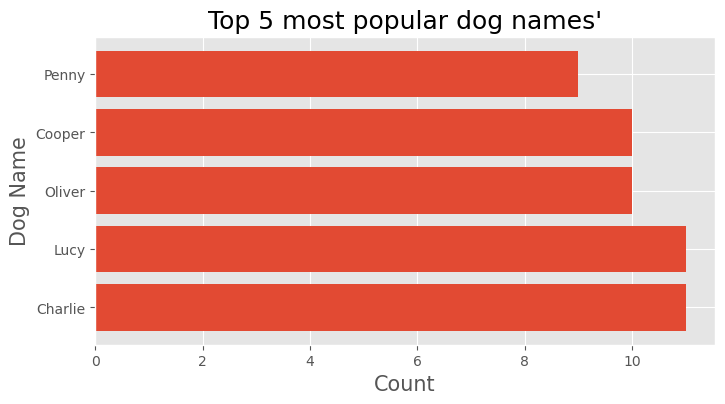

In [59]:
def bar():
    plt.figure(figsize=(8,4))
    # bar plot with matplotlib
    plt.barh('index', 'count',data= name_freq)
    plt.xlabel("Count", size=15)
    plt.ylabel("Dog Name", size=15)
    plt.title("Top 5 most popular dog names'", size=18)
    plt.savefig('dog_name.png')
bar()

### Insights:
1. Which dogs stages are most popular in our dataset?

In [60]:
df.dog_stage.value_counts()

None       1296
pupper      137
doggo        40
puppo        16
floofer       5
Name: dog_stage, dtype: int64

### Visualization

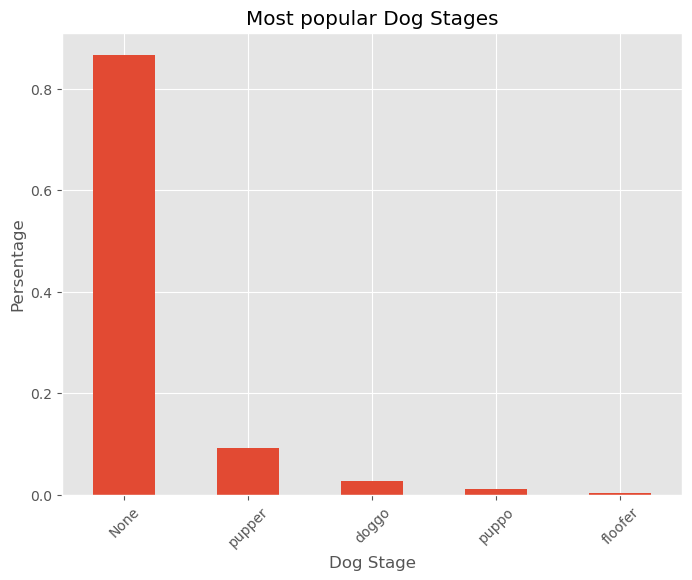

In [61]:
plt.figure(figsize=(8,6))
df.dog_stage.value_counts(normalize=True).sort_values(ascending=False).plot.bar()
plt.title('Most popular Dog Stages')
plt.xticks(rotation=45)
plt.xlabel("Dog Stage")
plt.ylabel("Persentage");
plt.savefig('dog_stage.png')

###### Analysis
-  From the result obove, we can see over 80% of tweets don't give dog stage info in the tweets, but to answer our posted question `Pupper` is most common dog stage. 

### Insights:
2. Which sources/devices are people using the most to tweet?

In [62]:
df.source.value_counts()

Twitter for iPhone     1419
Vine - Make a Scene      45
Twitter Web Client       20
TweetDeck                10
Name: source, dtype: int64

###### Analysis
Twitter for iPhone is most source used for tweets in this dataset.

### Visualization

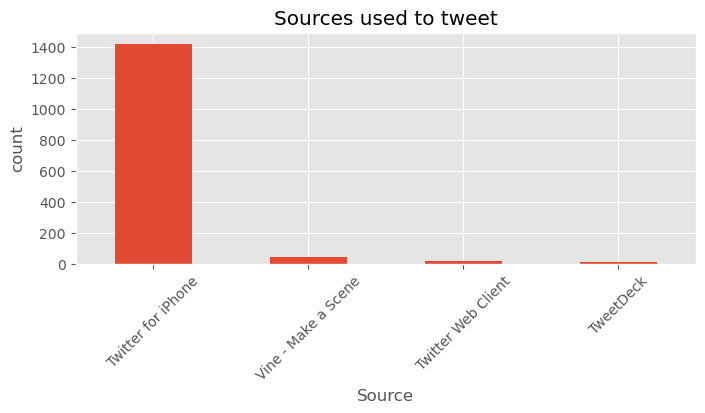

In [63]:
plt.figure(figsize=(8,3))
df.source.value_counts().sort_values(ascending=False).plot.bar()
plt.title('Sources used to tweet')
plt.xticks(rotation=45)
plt.xlabel("Source")
plt.ylabel("count");

### Sources

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html
https://stackoverflow.com/questions/17950374/converting-a-column-within-pandas-dataframe-from-int-to-string
https://ai.plainenglish.io/exploratory-data-analysis-eda-with-python-matplotlib-bb784e1d3dd3
https://sparkbyexamples.com/pandas/pandas-drop-rows-with-condition/
https://www.digitalocean.com/community/tutorials/pandas-drop-duplicate-rows-drop_duplicates-function
https://stackoverflow.com/questions/65654301/how-to-create-pandas-dataframe-by-reading-list-of-dictionary-from-txt-file